In [2]:
%matplotlib inline

In [3]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis.resonator import plot_resonator, lmfit_models, lmfit_resonator

In [26]:
plot_directory = '/home/flanigan/temp/'

In [4]:
npd = npy.NumpyDirectory('/data/detectors/2017-03-01_135904_led.npd/')

In [5]:
swp = npd.SingleSweep0
sss = npd.SingleSweepStream1
snap = npd.ADCSnap2

In [6]:
sss.stream.tone_offset_frequency()

array([ 0.])

In [7]:
swp.fit_resonator(model=lmfit_resonator.LinearLossResonatorWithCable)
sss.sweep.fit_resonator(model=lmfit_resonator.LinearLossResonatorWithCable)

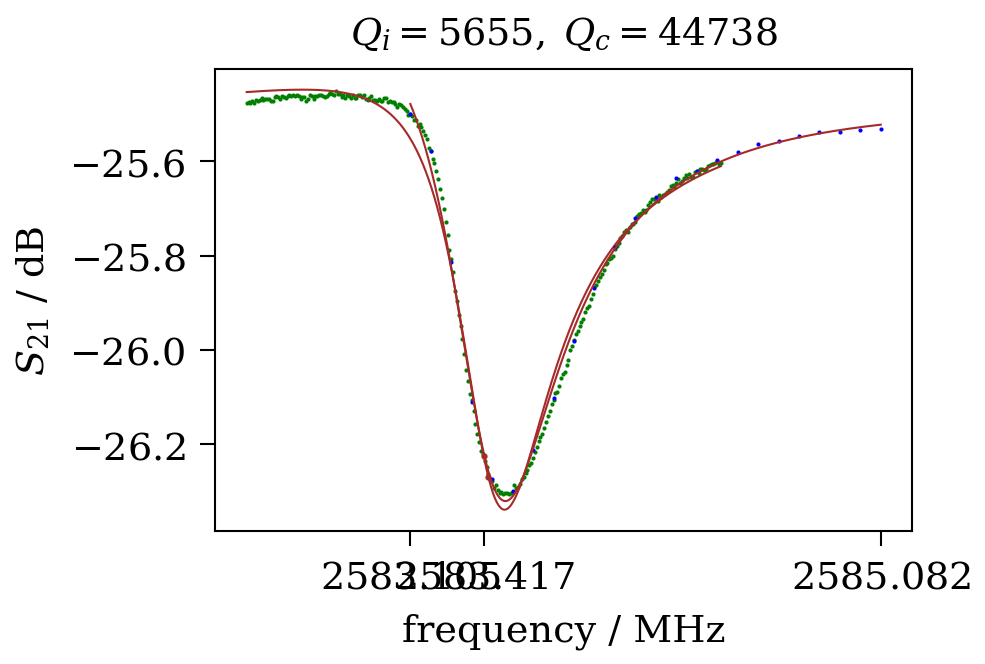

In [8]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / MHz')
ax.set_ylabel('$S_{21}$ / dB')
plot_resonator.amplitude(ax, sss.resonator, data_color='green')
plot_resonator.amplitude(ax, swp.resonator)
ax.set_title(r'$Q_i = {:.0f}, \; Q_c = {:.0f}$'.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

In [14]:
i_color = 'brown'
x_color = 'blue'

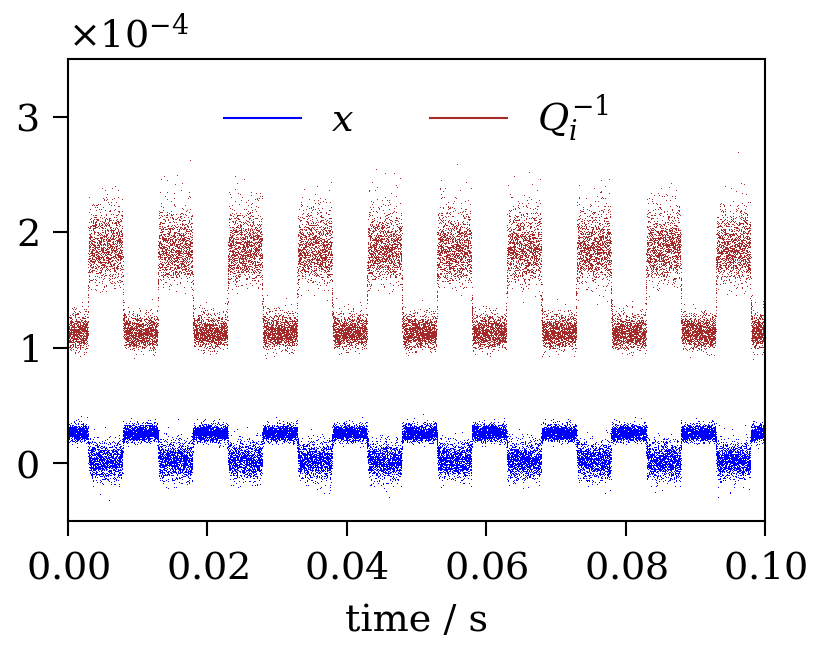

In [28]:
start_index = 0
end_index = 2**15
fig, ax = plt.subplots()
ax.set_xlabel('time / s')
ax.set_xlim(0, 0.1)
ax.set_ylim(-50e-6, 350e-6)
ax.plot(sss.stream.sample_time[start_index:end_index],
        sss.x[start_index:end_index], ',', color=x_color)
ax.plot(sss.stream.sample_time[start_index:end_index],
        sss.q[start_index:end_index], ',', color=i_color)
ax.plot([], linestyle='-', color=x_color, label='$x$')
ax.plot([], linestyle='-', color=i_color, label='$Q_i^{-1}$')
ax.legend(ncol=2, loc='upper center')

fig.savefig(plot_directory + 'led_square_x_and_i_vs_time.png')

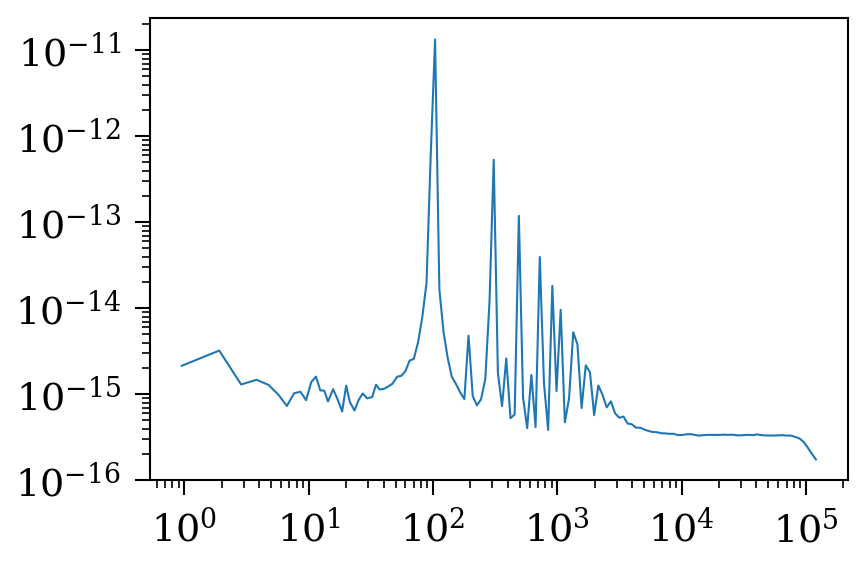

In [11]:
fig, ax = plt.subplots()
ax.loglog(sss.S_frequency, sss.S_xx)

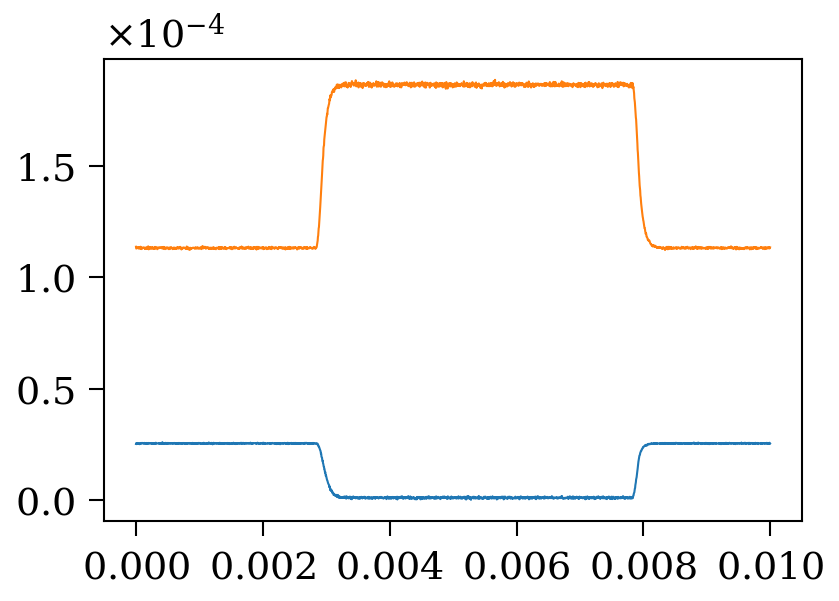

In [12]:
f_led = 100
T_led = 1 / f_led
T_samples = int(np.round(T_led * sss.stream.stream_sample_rate))
t = sss.stream.sample_time[:T_samples]
last_sample = T_samples * int(sss.x.size / T_samples)
fig, ax = plt.subplots()
ax.plot(t, sss.stream.fold(sss.x[:last_sample], T_samples))
ax.plot(t, sss.stream.fold(sss.q[:last_sample], T_samples))

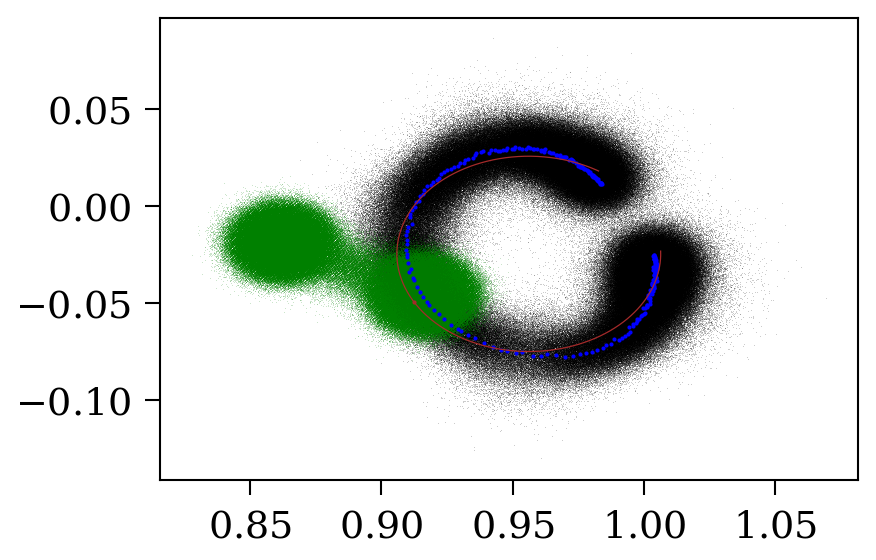

In [13]:
fig, ax = plt.subplots()
plot_basic.sss_complex_plane(sss, ax)